In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('9个月总数据.csv')

In [8]:
fault_counts = df.groupby(["月份", "最高报警等级"]).size().reset_index(name="次数")
fault_counts

,月份,最高报警等级,次数
0,1,0,148079
1,1,1,1
2,1,2,843
3,2,0,131362
4,2,1,1
5,2,2,13462
6,3,0,146061
7,3,2,18687
8,4,0,77413
9,4,1,1


In [10]:
fault_pivot = fault_counts.pivot(index="月份", columns="最高报警等级", values="次数").fillna(0)
# 若需要重新命名列名，可手动指定
fault_pivot.columns = ["故障等级0", "故障等级1", "故障等级2", "故障等级3"]
print(fault_pivot)

       故障等级0  故障等级1    故障等级2  故障等级3
月份                                 
1   148079.0    1.0    843.0    0.0
2   131362.0    1.0  13462.0    0.0
3   146061.0    0.0  18687.0    0.0
4    77413.0    1.0      0.0    0.0
5   167567.0    0.0      1.0    0.0
6   148534.0    1.0   5708.0    2.0
7   151865.0    2.0      2.0   62.0
8   115442.0    0.0      0.0   37.0
9    40940.0    0.0      1.0   96.0


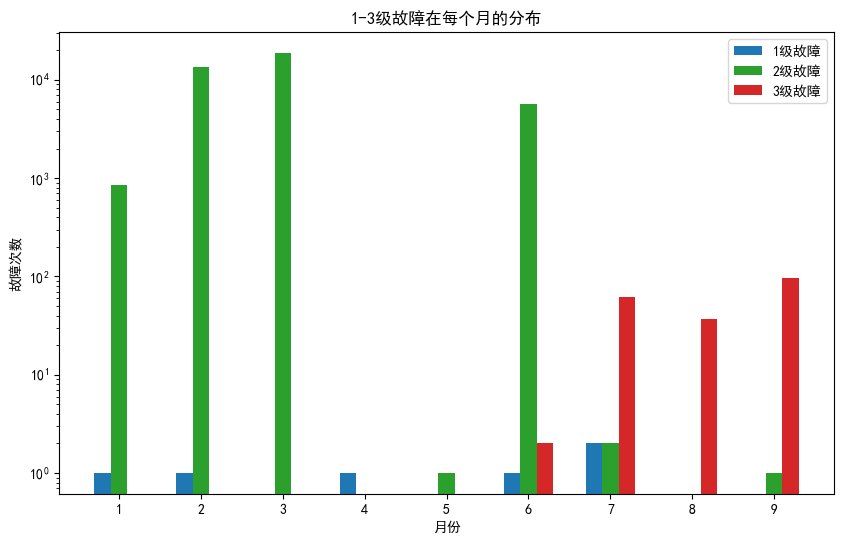

In [20]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决坐标轴负号显示问题

fault_pivot_nozero = fault_pivot[['故障等级1', '故障等级2', '故障等级3']]

# 绘制分组柱状图
fig, ax = plt.subplots(figsize=(10, 6))

# x 轴序列
months = fault_pivot_nozero.index
x = np.arange(len(months))

# 设置柱状条宽度
bar_width = 0.2

# 分别绘制 1/2/3 级故障
ax.bar(x - bar_width, fault_pivot_nozero['故障等级1'], 
       width=bar_width, label='1级故障', color='#1f77b4')
ax.bar(x, fault_pivot_nozero['故障等级2'], 
       width=bar_width, label='2级故障', color='#2ca02c')
ax.bar(x + bar_width, fault_pivot_nozero['故障等级3'], 
       width=bar_width, label='3级故障', color='#d62728')

# 设置 x 轴刻度与标签
ax.set_xticks(x)
ax.set_xticklabels(months)

# 设置坐标轴标签和图表标题
ax.set_xlabel('月份')
ax.set_ylabel('故障次数')
ax.set_title('1-3级故障在每个月的分布')

# 显示图例
ax.legend()

# 1-3 级故障次数过小，尝试使用对数刻度：
ax.set_yscale('log')

plt.show()


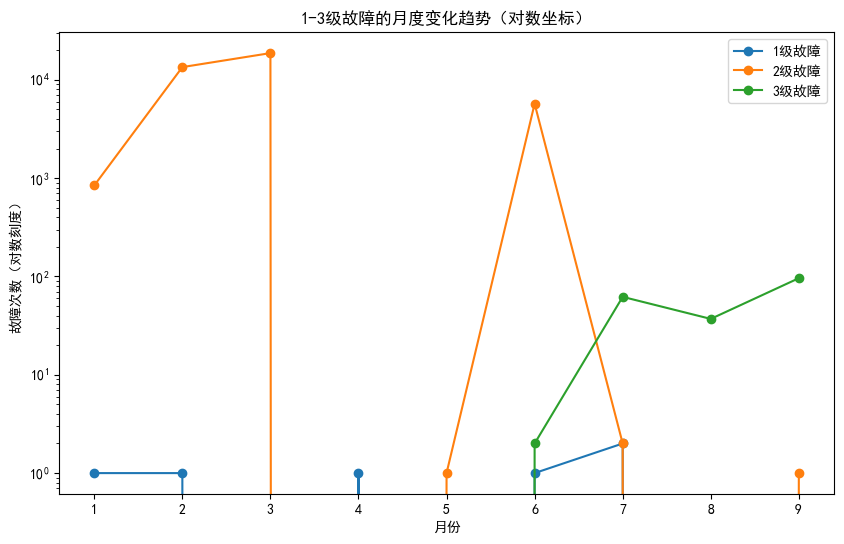

In [22]:
months = fault_pivot_nozero.index

#绘制折线图
fig, ax = plt.subplots(figsize=(10, 6))

#分别绘制 1/2/3 级故障随月份的折线，marker='o'使折线图上有数据点标记
ax.plot(months, fault_pivot_nozero['故障等级1'], marker='o', label='1级故障')
ax.plot(months, fault_pivot_nozero['故障等级2'], marker='o', label='2级故障')
ax.plot(months, fault_pivot_nozero['故障等级3'], marker='o', label='3级故障')

#使用对数坐标轴
ax.set_yscale('log')

#设置 x 轴刻度
ax.set_xticks(months)
ax.set_xticklabels(months)

#设置坐标轴标签和图表标题
ax.set_xlabel('月份')
ax.set_ylabel('故障次数（对数刻度）')
ax.set_title('1-3级故障的月度变化趋势（对数坐标）')

#显示图例
ax.legend()

#展示图表
plt.show()

In [24]:
monthly_stats = df.groupby("月份").agg({
    "车速": "mean",
    "SOC": "mean"
}).reset_index()
# 为可读性改下列名
monthly_stats.columns = ["月份", "平均车速", "平均SOC"]
print(monthly_stats)

   月份       平均车速      平均SOC
0   1  21.670264  66.850567
1   2  21.316845  67.408666
2   3  19.628709  65.062332
3   4  21.542309  64.594092
4   5  22.463558  59.557362
5   6  21.400062  56.891601
6   7  19.586365  54.107365
7   8  21.857134  54.938759
8   9  20.161920  54.776446


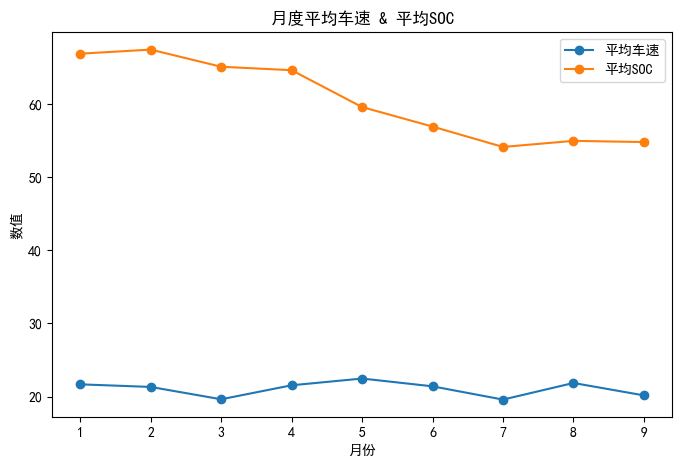

In [26]:
plt.figure(figsize=(8, 5))

# 绘制平均车速曲线
plt.plot(monthly_stats["月份"], monthly_stats["平均车速"], marker='o', label="平均车速")

# 绘制平均SOC曲线
plt.plot(monthly_stats["月份"], monthly_stats["平均SOC"], marker='o', label="平均SOC")

plt.xlabel("月份")
plt.ylabel("数值")
plt.title("月度平均车速 & 平均SOC")
plt.legend()
plt.show()

In [31]:
monthly_charge = df.groupby(["月份", "充电状态"]).size().unstack(fill_value=0)
print(monthly_charge.head())

充电状态    1       3    4    254
月份                           
1     15558  132422  816  127
2     19616  124545  454  210
3     15584  148668  340  156
4      7470   69778  147   19
5     16776  150417  328   47


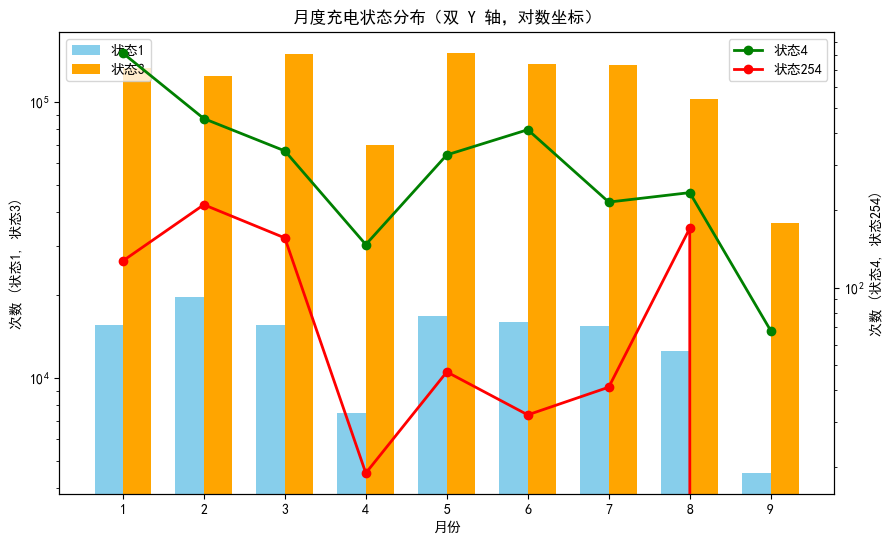

In [41]:
months = monthly_charge.index.tolist()  # [1,2,3,4,5]
x = np.arange(len(months))
bar_width = 0.35

fig, ax1 = plt.subplots(figsize=(10,6))

# 左侧轴：绘制状态1和状态3（数值较大）
ax1.bar(x - bar_width/2, monthly_charge[1], width=bar_width, 
        label='状态1', color='skyblue')
ax1.bar(x + bar_width/2, monthly_charge[3], width=bar_width, 
        label='状态3', color='orange')
ax1.set_xlabel('月份')
ax1.set_ylabel('次数 (状态1, 状态3)')
ax1.set_xticks(x)
ax1.set_xticklabels(months)
ax1.set_yscale('log')  # 对数坐标
ax1.legend(loc='upper left')

# 右侧轴：绘制状态4和状态254（数值较小）
ax2 = ax1.twinx()
ax2.plot(x, monthly_charge[4], marker='o', label='状态4', color='green', linewidth=2)
ax2.plot(x, monthly_charge[254], marker='o', label='状态254', color='red', linewidth=2)
ax2.set_ylabel('次数 (状态4, 状态254)')
ax2.set_yscale('log')
ax2.legend(loc='upper right')

plt.title('月度充电状态分布（双 Y 轴，对数坐标）')
plt.show()

In [55]:
speed_soc_stats = df.groupby('月份').agg({
    '车速': ['mean', 'max'],
    'SOC': 'mean'
})
# 扁平化多级索引
speed_soc_stats.columns = ['车速均值', '车速最大', 'SOC均值']
speed_soc_stats = speed_soc_stats.reset_index()


# 统计充电状态次数
# 我们只统计充电状态为1, 3, 4, 254四种情况
charge_counts = df.groupby(['月份', '充电状态']).size().unstack(fill_value=0).reset_index()
# 将充电状态列重命名为对应的指标名称
charge_counts = charge_counts.rename(columns={
    1: "停车充电(状态1)",
    3: "未充电状态(状态3)",
    4: "充电完成(状态4)",
    254: "状态3-4转变(状态254)"
})
# 如果某些状态的列不存在，则补充为0
for col in ["停车充电(状态1)", "未充电状态(状态3)", "充电完成(状态4)", "状态3-4转变(状态254)"]:
    if col not in charge_counts.columns:
        charge_counts[col] = 0


#合并各项指标，生成月度指标表
monthly_stats = speed_soc_stats.merge(charge_counts, on='月份', how='left')

# 重新排列列顺序
monthly_stats = monthly_stats[['月份', '车速均值', '车速最大', 'SOC均值', 
                               '停车充电(状态1)', '未充电状态(状态3)', '充电完成(状态4)', '状态3-4转变(状态254)']]

# 输出结果
print(monthly_stats)

   月份       车速均值   车速最大      SOC均值  停车充电(状态1)  未充电状态(状态3)  充电完成(状态4)  \
0   1  21.670264  327.6  66.850567      15558      132422        816   
1   2  21.316845  327.6  67.408666      19616      124545        454   
2   3  19.628709  327.6  65.062332      15584      148668        340   
3   4  21.542309  327.6  64.594092       7470       69778        147   
4   5  22.463558  327.6  59.557362      16776      150417        328   
5   6  21.400062  327.6  56.891601      15915      137887        411   
6   7  19.586365  327.6  54.107365      15390      136285        215   
7   8  21.857134  116.5  54.938759      12552      102523        234   
8   9  20.161920  108.3  54.776446       4526       36443         68   

   状态3-4转变(状态254)  
0             127  
1             210  
2             156  
3              19  
4              47  
5              32  
6              41  
7             170  
8               0  


In [71]:
styled_stats = (monthly_stats.style
                .background_gradient(cmap='YlGnBu')  # 背景颜色渐变
                .format(precision=2)                # 保留两位小数
                .set_properties(**{'text-align': 'center'})  # 居中对齐
                .set_caption("月度指标表")            # 设置表格标题
               )
styled_stats

,月份,车速均值,车速最大,SOC均值,停车充电(状态1),未充电状态(状态3),充电完成(状态4),状态3-4转变(状态254)
0,1,21.67,327.60,66.85,15558,132422,816,127
1,2,21.32,327.60,67.41,19616,124545,454,210
2,3,19.63,327.60,65.06,15584,148668,340,156
3,4,21.54,327.60,64.59,7470,69778,147,19
4,5,22.46,327.60,59.56,16776,150417,328,47
5,6,21.40,327.60,56.89,15915,137887,411,32
6,7,19.59,327.60,54.11,15390,136285,215,41
7,8,21.86,116.50,54.94,12552,102523,234,170
8,9,20.16,108.30,54.78,4526,36443,68,0
